In [1]:
!pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("netflix_titles_nov_2019.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


,show_id,release_year
count,5.837000e+03,5837.000000
mean,7.730079e+07,2013.688539
std,9.479777e+06,8.419088
min,2.698800e+05,1925.000000
25%,8.004520e+07,2013.000000
50%,8.016353e+07,2016.000000
75%,8.024188e+07,2018.000000
max,8.122720e+07,2020.000000


In [4]:
df.isnull().sum()
df['country'].fillna('unknown')

0                    South Korea
1                        unknown
2                          India
3       France, Senegal, Belgium
4         Canada, United Kingdom
                  ...           
5832               United States
5833               United States
5834                     Denmark
5835               United States
5836               United States
Name: country, Length: 5837, dtype: object

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df['date_added']=pd.to_datetime(df['date_added'])

<Axes: xlabel='type'>

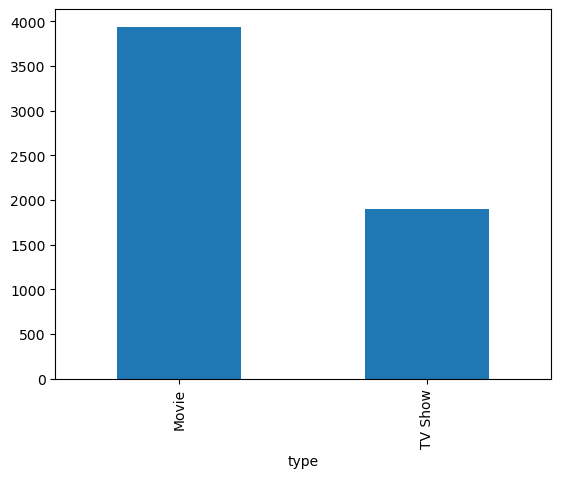

In [7]:
df['type'].value_counts().plot(kind='bar')



In [12]:
import seaborn as sns
import os

<Axes: xlabel='type', ylabel='count'>

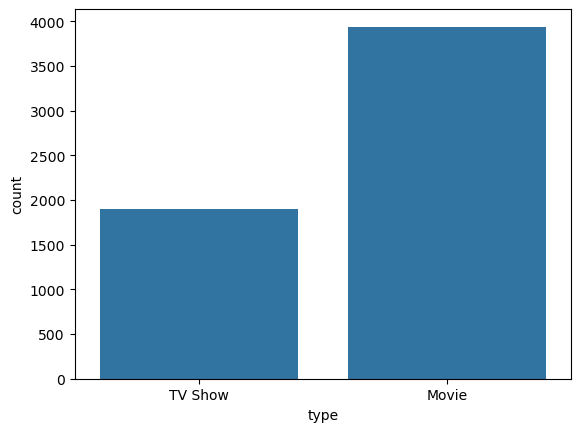

In [9]:
sns.countplot(data=df,x='type')


In [10]:
import matplotlib.pyplot as plt

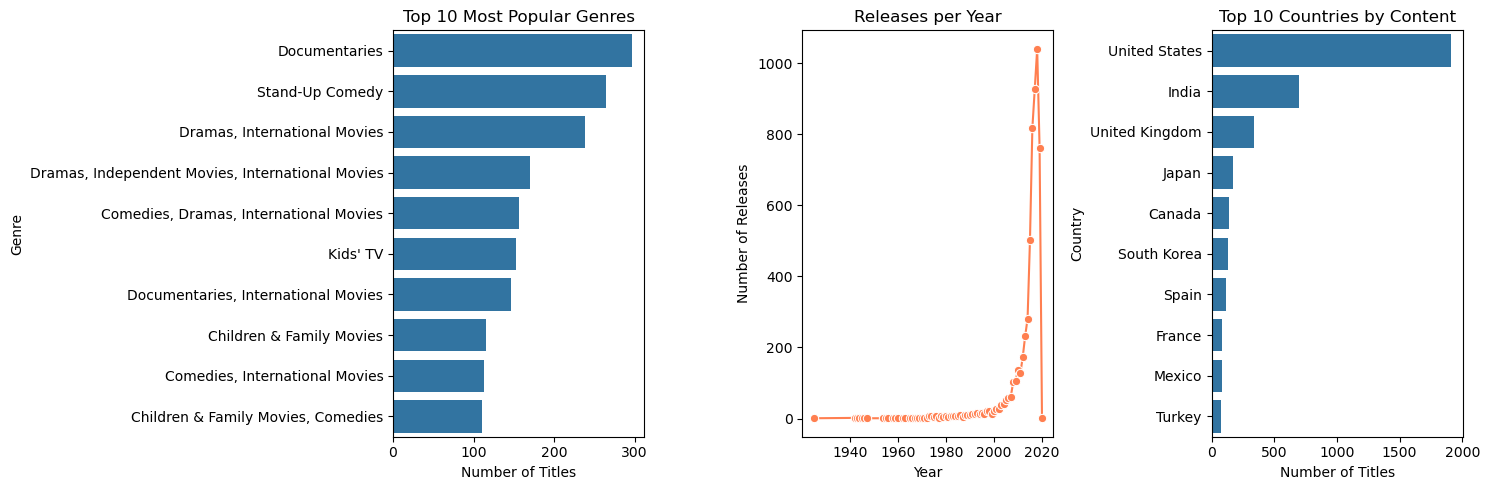

In [16]:
os.makedirs("images", exist_ok=True)
plt.figure(figsize=(15,5))

# ------------------ 1. Top Genres ------------------
plt.subplot(1,3,1)
top_genres = df['listed_in'].value_counts().head(10)
sns.barplot(
    x=top_genres.values, 
    y=top_genres.index, 
   
)
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')

# ------------------ 2. Releases per Year ------------------
plt.subplot(1,3,2)
year_count = df['release_year'].value_counts().sort_index()
sns.lineplot(
    x=year_count.index, 
    y=year_count.values, 
    marker='o', 
    color='coral'
)
plt.title('Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')

# ------------------ 3. Top Countries ------------------
plt.subplot(1,3,3)
top_countries = df['country'].value_counts().head(10)
sns.barplot(
    x=top_countries.values, 
    y=top_countries.index, 
    
)
plt.title('Top 10 Countries by Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')

# ------------------ Save & Show ------------------
plt.tight_layout()
plt.savefig("images/netflix_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

In [33]:
print("📌 Insights from Analysis:")
print(f"1️⃣ Most popular genre: {top_genres.index[0]} with {top_genres.values[0]} titles.")
print(f"2️⃣ Year with most releases: {year_count.idxmax()} with {year_count.max()} releases.")
print(f"3️⃣ Top content-producing country: {top_countries.index[0]} with {top_countries.values[0]} titles.")


📌 Insights from Analysis:
1️⃣ Most popular genre: Documentaries with 297 titles.
2️⃣ Year with most releases: 2018 with 1040 releases.
3️⃣ Top content-producing country: United States with 1907 titles.
